In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.4,
              rc={"figure.figsize": [10, 6]})

In [78]:
def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None, alpha=1):                                       
    # multiclass                                                                                                                 
    if eps is None:                                                                                                              
      eps = X.std() / 2.                                                                                                       

    if ax is None:                                                                                                               
      ax = plt.gca()                                                                                                           

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps                                                                      
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps                                                                      
    xx = np.linspace(x_min, x_max, 100)                                                                                         
    yy = np.linspace(y_min, y_max, 100)                                                                                         

    X1, X2 = np.meshgrid(xx, yy)                                                                                                 
    X_grid = np.c_[X1.ravel(), X2.ravel()]                                                                                       
    decision_values = classifier.predict(X_grid)                                                                                 
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,                                                           
                                                       y_min, y_max),                                                          
            aspect='auto', origin='lower', alpha=alpha, cmap='coolwarm')                                                               
    ax.set_xlim(x_min, x_max)                                                                                                    
    ax.set_ylim(y_min, y_max)                                                                                                    
    ax.set_xticks(())                                                                                                            
    ax.set_yticks(())  

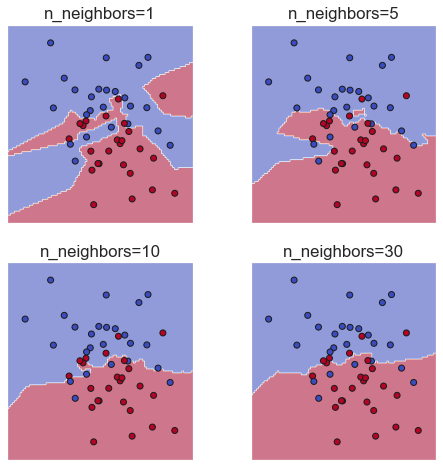

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, cluster_std=2, random_state=0, n_samples=50)
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
for ax, n_neighbors in zip(axes.ravel(), [1, 5, 10, 30]):
    ax.set_title(f"n_neighbors={n_neighbors}")
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plot_2d_classification(clf, X, ax=ax, alpha=.5)
    ax.set_aspect("equal")
fig.savefig("images/knn_boundary_n_neighbors.png", bbox_inches='tight')

In [86]:
from sklearn.model_selection import train_test_split

neighbors = range(1, 30, 2)

training_scores = []
test_scores = []
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

for n_neighbors in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    training_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

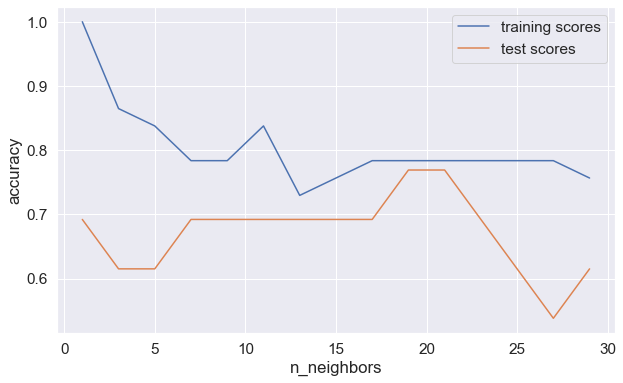

In [87]:
plt.figure()
plt.plot(neighbors, training_scores, label="training scores")
plt.plot(neighbors, test_scores, label="test scores")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig("images/knn_model_complexity.png", bbox_inches='tight')

In [ ]:
line = np.linspace(0, 8, 100)
train = 1./(1 + np.exp(-line))
plt.plot(train, label='training accuracy')
gen_true = - (line/ 10) ** 2 + (line/10 - .5) ** 3 + 1
gen_true = train - (line/15) ** 2 - .2
plt.plot(gen_true, label="generalization")
plt.ylabel("Accuracy")
plt.xlabel("Model Complexity")
plt.legend()
plt.savefig("images/overfitting_validation_set_1.svg")

In [ ]:
rng = np.random.RandomState(0)
plt.plot(train, label='training accuracy')
plt.plot(gen_true, label="generalization")
validation_set = gen_true + rng.normal(scale=.07, size=100)
plt.plot(validation_set, label="validation set")
plt.ylabel("Accuracy")
plt.xlabel("Model Complexity")
plt.legend()
plt.savefig("images/overfitting_validation_set_2.svg")

In [ ]:
import pandas as pd

In [ ]:
approval = pd.read_csv("data/approval_topline.csv", parse_dates=['timestamp'], index_col='timestamp')

In [ ]:
approval_est = approval.loc[approval['subgroup'] == "Adults", ["approve_estimate"]]

In [ ]:
approval_est.to_csv("data/approval_processed.csv")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
approval_est.plot(ax=ax)
ax.set_title("Approval Ratings")
fig.savefig("images/approval_ratings.png")

In [ ]:
from matplotlib.patches import Rectangle
rng = np.random.RandomState(42)
fig, ax = plt.subplots(figsize=(10, 6))
approval_est.plot(ax=ax)
xlim, ylim = ax.get_xlim(), ax.get_ylim()

for i in range(20):
    rect = Rectangle((rng.randint(xlim[0], xlim[1]), ylim[0]), 10,
                     ylim[1]-ylim[0], facecolor='#FFAAAA', alpha=0.8)
    ax.add_artist(rect)
    
# plt.title("Presidential approval estimates by fivethirtyeight")
plt.legend([rect], ['Random Test Set'] )
ax.set_xlabel("")
ax.set_title("Approval Ratings")
fig.savefig("images/approval_ratings_random.png")

In [ ]:
from matplotlib.patches import Rectangle

rng = np.random.RandomState(42)
approval_est.plot()

ax = plt.gca()
xlim, ylim = ax.get_xlim(), ax.get_ylim()
rect = Rectangle((xlim[1] - 300, ylim[0]), 300, ylim[1]-ylim[0], facecolor='#FFAAAA', alpha=0.8)
ax.add_artist(rect)

plt.title("Approvael Ratings")
plt.legend([rect], ['Structured Test Set'] )
ax.set_xlabel("")
plt.savefig("images/approval_ratings_structured.png")